In [1]:
# 불필요한 경고 메시지 삭제
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
  iris_data.data,
  iris_data.target,
  test_size=0.2,
  random_state=11
)

# 결정 트리 모델 생성

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

# Graphviz 시각화
- Tree 모델이 어떻게 학습했는가를 시각화하기 위한 도구

In [4]:
from sklearn.tree import export_graphviz

In [5]:
export_graphviz(
    dt_clf, # 시각화할 모델(훈련된 모델을 넣을 것)
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names = iris_data.target_names, # 각 클래스의 문자열 이름
    feature_names = iris_data.feature_names, # 각 특성(feature)의 이름
    impurity=True,
    filled=True

)

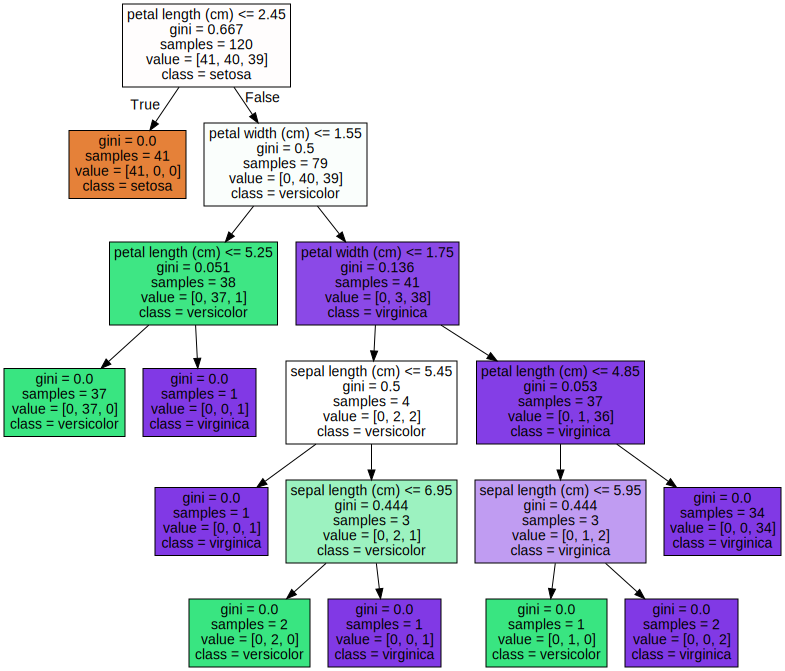

In [6]:
import graphviz

with open("tree.dot") as f :
  dot_graph = f.read()

graphviz.Source(dot_graph) # 과대적합

# 정확도 확인

In [9]:
from sklearn.metrics import accuracy_score

train_pred = dt_clf.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred = dt_clf.predict(X_test) # 새로 보는 데이터에 대한 예측

print("훈련세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련세트에 대한 점수 : 1.000
테스트세트에 대한 점수 : 0.933


# max_depth를 이용한 질문의 깊이 제어_과적합 방지

In [10]:
dt_clf_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

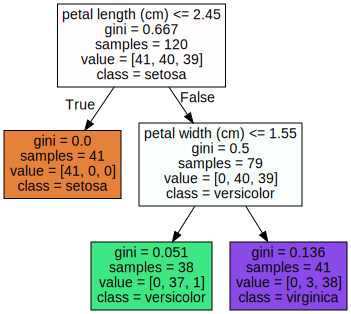

In [11]:
export_graphviz(
    dt_clf_depth_2, # 시각화할 모델
    out_file="tree.dot", # 시각화 결과물 파일 경로
    class_names=iris_data.target_names, # 각 클래스의 문자열 이름
    feature_names=iris_data.feature_names, # 각 특성(feature)의 이름
    impurity=True,
    filled=True
)

with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [13]:
train_pred = dt_clf_depth_2.predict(X_train) # 알고 있는 데이터에 대한 예측
test_pred = dt_clf_depth_2.predict(X_test) # 새로 보는 데이터에 대한 예측

print("훈련세트에 대한 점수 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트세트에 대한 점수 : {:.3f}".format(accuracy_score(y_test, test_pred)))

훈련세트에 대한 점수 : 0.967
테스트세트에 대한 점수 : 0.867
